# Part II - (US Flights Review)
## by (Ugochukwu Okpoko)


## Investigation Overview

In this presentation, we will review the features that will help US residents make the best flight decisions with regards to Airlines, Day and time to schedule flights. We will also look at a way out for the worst Airline.

## Dataset Overview

There are 5.2 million US flights in the dataset scheduled between 2006 and 2008 from January to April. The dataset has 20 variables, some important features are; Day, Departure hour, Airline, and Distance.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
sb.set_style('darkgrid')
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.filterwarnings("ignore")


In [2]:
# load in the dataset into a pandas dataframe
flight_data = pd.read_csv('flights_clean')
flight_data.head(5)

,year,month,crsdeptime,distance,cancelled,cancellationcode,diverted,origin_airport,city,airline,type,manufacturer,aircraft_type,engine_type,airplane_issue_year,date,day,crsdephour,state,destination_airport
0,2006,January,07:45,1587,no,None,no,William B Hartsfield-Atlanta Intl,Atlanta,US Airways Inc.,Corporation,AIRBUS INDUSTRIE,Fixed Wing Multi-Engine,Turbo-Jet,1999,2006-01-11,Wednesday,7,Georgia,Phoenix Sky Harbor International
1,2006,January,17:05,1587,no,None,no,William B Hartsfield-Atlanta Intl,Atlanta,US Airways Inc.,Corporation,AIRBUS INDUSTRIE,Fixed Wing Multi-Engine,Turbo-Jet,1999,2006-01-18,Wednesday,17,Georgia,Phoenix Sky Harbor International
2,2006,January,07:45,1587,no,None,no,William B Hartsfield-Atlanta Intl,Atlanta,US Airways Inc.,Corporation,AIRBUS INDUSTRIE,Fixed Wing Multi-Engine,Turbo-Jet,1999,2006-01-25,Wednesday,7,Georgia,Phoenix Sky Harbor International
3,2006,January,17:05,1587,no,None,no,William B Hartsfield-Atlanta Intl,Atlanta,US Airways Inc.,Corporation,AIRBUS INDUSTRIE,Fixed Wing Multi-Engine,Turbo-Jet,1999,2006-01-27,Friday,17,Georgia,Phoenix Sky Harbor International
4,2006,January,07:55,1587,no,None,no,William B Hartsfield-Atlanta Intl,Atlanta,US Airways Inc.,Corporation,AIRBUS INDUSTRIE,Fixed Wing Multi-Engine,Turbo-Jet,1999,2006-01-04,Wednesday,7,Georgia,Phoenix Sky Harbor International


In [3]:
# modifying the crsdephour column to HH time format.
flight_data['crsdephour'] = flight_data.crsdeptime.str[:2]

In [4]:
# convert day, month, and crsdephour into ordered categorical types
ordinal_var_dict = {'day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                    'month': ['January', 'February', 'March', 'April'],
                    'crsdephour': ['01', '02', '03','04', '05', '06', '07', '08', '09', '10', '11','12'
                                  ,'13','14', '15', '16', '17', '18', '19', '20', '21','22','23','00']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    flight_data[var] = flight_data[var].astype(ordered_var)

In [5]:
#  compute the logarithm of distance to make plotting easier.
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

flight_data['log_distance'] = flight_data['distance'].apply(log_trans)

## Distribution of Scheduled Flights

1% of the total flights booked were cancelled. For cancelled flights, 41% were due to Airlines while 39% were associated with Weather, about 20% were due to NAS, and less than 1% were due to Security.



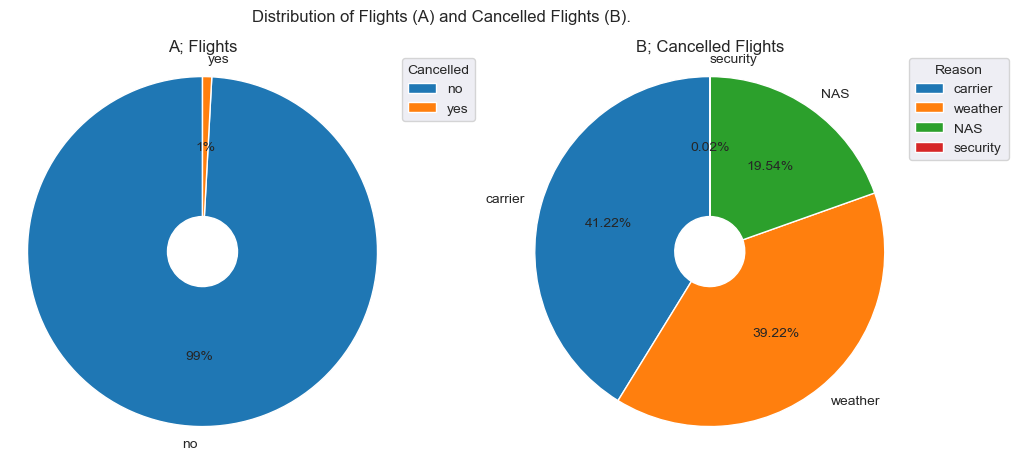

In [7]:
plt.figure(figsize = [12, 5]) 
#plt.subplots_adjust(wspace=0.6)

plt.subplot(1, 2, 1) 
fmt = flight_data["cancelled"].value_counts()/flight_data.cancelled.value_counts().sum()
plt.pie(x=flight_data["cancelled"].value_counts(), 
        labels=flight_data["cancelled"].value_counts().index, startangle=90,
       autopct='%.f%%',wedgeprops = {'width' : 0.8});
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left',title="Cancelled");
plt.axis('square')
plt.title('A; Flights');

plt.subplot(1, 2, 2) 
completed_flights = flight_data[flight_data.cancellationcode == 'None']
cancelled_flights = flight_data[flight_data.cancellationcode != 'None']
count = cancelled_flights.cancellationcode.value_counts()
fmt = count/count.sum()
plt.pie(x=cancelled_flights.cancellationcode.value_counts(), 
        labels=count.index, startangle=90,
       autopct='%.2f%%',wedgeprops = {'width' : 0.8});
plt.legend(bbox_to_anchor=(1, 1.02), loc='upper left',title="Reason");
plt.axis('square')
plt.title('B; Cancelled Flights');
plt.suptitle('Distribution of Flights (A) and Cancelled Flights (B).');

## What is the Relationship  between Departure Hour and flights? 

Flights were generally booked for takeoff during the day (between 6am and 1pm) than at night. The highest count (7.1%) of flights were booked for 6am. 5pm also saw a shoot in booked flights (6.8%). The least number of scheduled flights were booked for 3am.

Hours of the day with more flights, had more cancelled flights; more cancelled flights were recorded during the day. 

It is advisable to scheduled flights for less busy hours to avoid flight cancellation; as departure hours with less than 150,000 scheduled flights saw the least cancelled flights

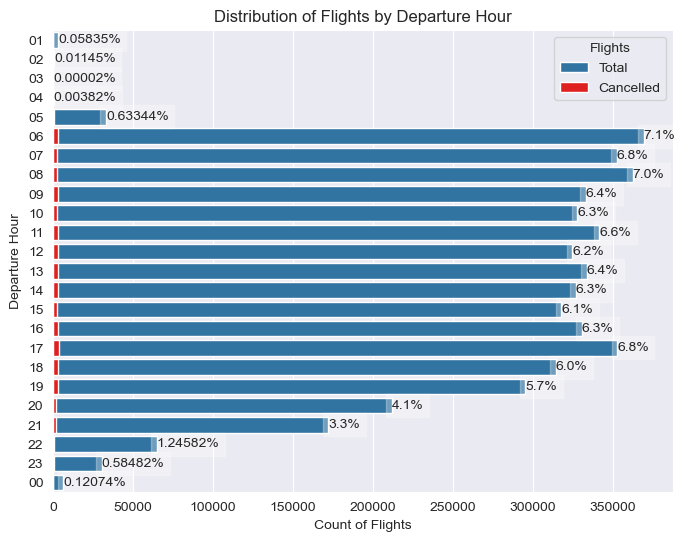

In [8]:

plt.figure(figsize=[8, 6])
base_color= sb.color_palette()[0]
sb.countplot(data=flight_data, y='crsdephour',color=base_color,label='Total')
sb.countplot(data=cancelled_flights, y='crsdephour',color='red', label= 'Cancelled')
plt.legend(title='Flights')
plt.ylabel('Departure Hour')
plt.xlabel('Count of Flights')
plt.title('Distribution of Flights by Departure Hour')
for i in range(flight_data.crsdephour.value_counts().shape[0]):  
    count = flight_data.crsdephour.value_counts(sort= False)[i]
    if count < 150000:
        pct_string = '{:0.5f}%'.format(100*count/flight_data.shape[0])
    else:
        pct_string = '{:0.1f}%'.format(100*count/flight_data.shape[0])
    plt.text(count,i, pct_string, va='center',bbox=dict(facecolor='white', alpha=0.3));

## What are the best and worst Airlines?

Southwest Airlines (about 800,000 flights) scheduled the most flights for the period, followed by Skywest Airlines (about 500,000 flights). Mesa Airlines is the 10th on the list with over 200,000 booked flights. Aloha Airlines had the least number of booked flights.

Some Airlines (Southwest > American Airways > Expressjet Airlines > American Eagle > Continental Air) have 100% record of flight completion.

Mesa Airlines (the worst Airline) had the highest number of cancelled flights; most (over 5000 flights) of which were due to Airlines (Carriers).


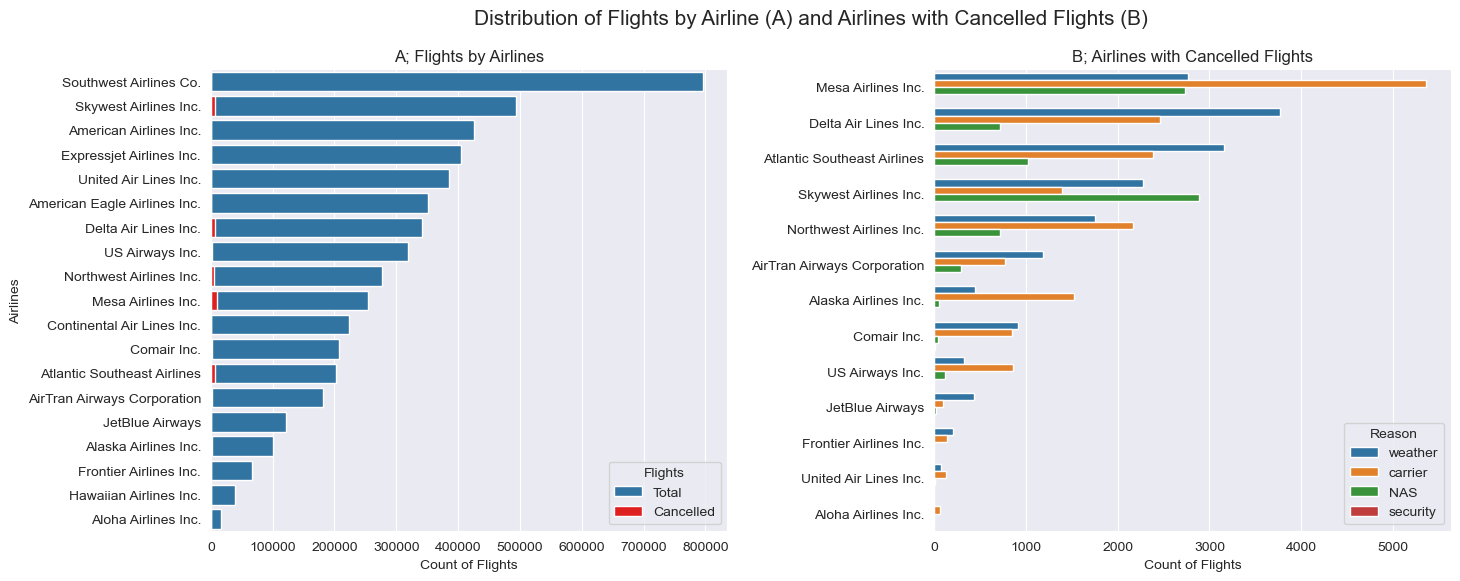

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(wspace=0.4, hspace=0.3)

order_airline = cancelled_flights.airline.value_counts().index
order_airline_2 =flight_data.airline.value_counts().index

sb.countplot(data = flight_data, y = 'airline', order= order_airline_2, label='Total', ax= ax[0], color=base_color)
sb.countplot(data = cancelled_flights, y = 'airline', order= order_airline_2, label='Cancelled' , ax= ax[0], color='red');
ax[0].set_title('A; Flights by Airlines')
ax[0].legend(title="Flights")
ax[0].set_ylabel('Airlines')
ax[0].set_xlabel('Count of Flights');

sb.countplot(data = cancelled_flights, y = 'airline', hue= 'cancellationcode', order= order_airline , ax= ax[1]);
ax[1].set_title('B; Airlines with Cancelled Flights')
ax[1].set_ylabel('');
ax[1].set_xlabel('Count of Flights')
ax[1].legend(title="Reason");

fig.suptitle('Distribution of Flights by Airline (A) and Airlines with Cancelled Flights (B)', size=15);

## Distribution of Flights by Year, Month and Day.

Flights for the period increased with year (2006 - 2008). Saturday and April had the least number of scheduled flights


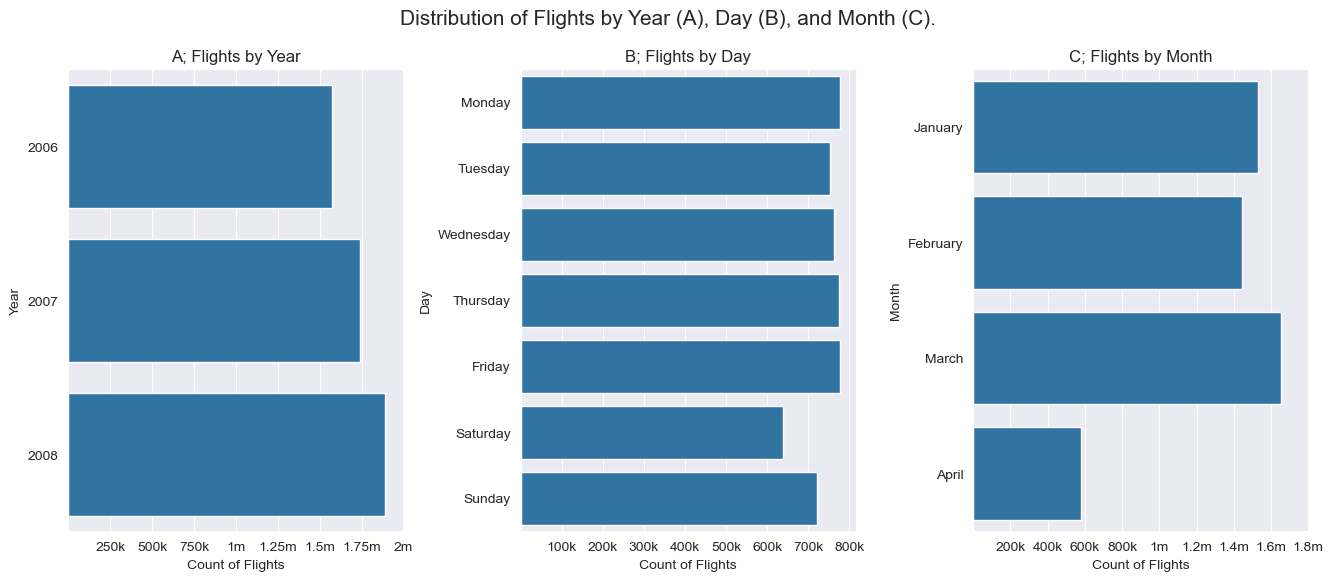

In [10]:
fig, ax = plt.subplots(1,3, figsize = [16,6])
fig.subplots_adjust(wspace=0.35, hspace=0.3)
base_color = sb.color_palette()[0]

sb.countplot(data = flight_data, y = 'year', color = base_color, ax = ax[0])
ax[0].set_xticks([0.25e6, 0.50e6, 0.75e6, 1.00e6, 1.25e6, 1.50e6, 1.75e6, 2.00e6], 
           ['250k', '500k', '750k', '1m', '1.25m', '1.5m', '1.75m', '2m'])
ax[0].set_ylabel('Year')
ax[0].set_xlabel('Count of Flights')
ax[0].set_title('A; Flights by Year');

sb.countplot(data = flight_data, y = 'day', color = base_color, ax = ax[1])
ax[1].set_ylabel('Day')
ax[1].set_xlabel('Count of Flights')
ax[1].set_title('B; Flights by Day');
ax[1].set_xticks([1e5, 2e5, 3e5, 4e5, 5e5, 6e5, 7e5, 8e5], 
           ['100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k']);

sb.countplot(data = flight_data, y = 'month', color = base_color, ax = ax[2])
ax[2].set_ylabel('Month')
ax[2].set_xlabel('Count of Flights')
ax[2].set_title('C; Flights by Month');
ax[2].set_xticks([0.2e6, 0.40e6, 0.6e6, 0.80e6, 1.00e6, 1.20e6, 1.40e6, 1.60e6, 1.80e6], 
           ['200k', '400k', '600k', '800k', '1m', '1.2m', '1.4m', '1.6m', '1.8m']);

plt.suptitle('Distribution of Flights by Year (A), Day (B), and Month (C).', size=15);

## Distribution of Cancelled Flights by Year, Month and Day.

Cancelled Flights tend to increase year-on-year. The least number of flights were cancelled in April and Saturday, respectively.

This corresponds with the number of scheduled flights; Year, Month, or Days with the least number of flights had the least number of cancelled flights.


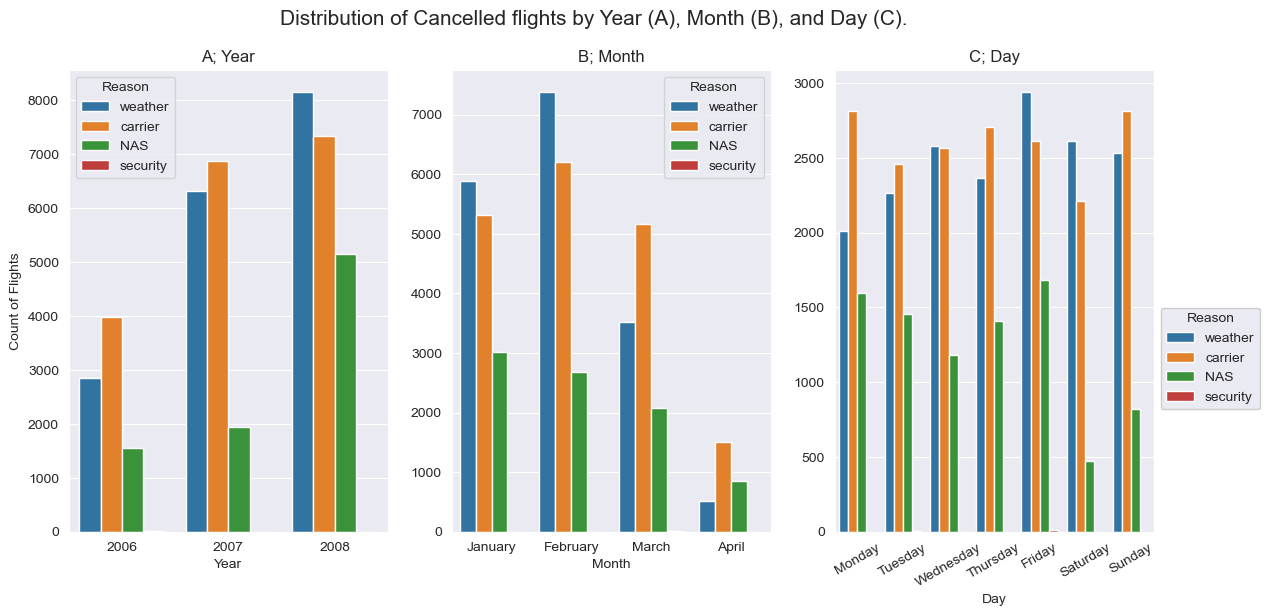

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

sb.countplot(data=cancelled_flights, x='year', hue='cancellationcode', ax=ax[0])
ax[0].set_ylabel("Count of Flights")
ax[0].set_xlabel("Year")
ax[0].set_title('A; Year');
ax[0].legend(title='Reason');

sb.countplot(data=cancelled_flights, x='month', hue='cancellationcode', ax=ax[1])
ax[1].set_ylabel("")
ax[1].set_xlabel("Month")
ax[1].set_title('B; Month')
ax[1].legend(title='Reason');

sb.countplot(data=cancelled_flights, x='day', hue='cancellationcode', ax=ax[2])
ax[2].tick_params(axis='x',rotation=30)
ax[2].legend(bbox_to_anchor=(1,0.5),framealpha=1, title='Reason')
ax[2].set_ylabel("")
ax[2].set_xlabel("Day")
ax[2].set_title('C; Day');

fig.suptitle('Distribution of Cancelled flights by Year (A), Month (B), and Day (C).', size=15);

## Are there possible impacts of Distance over Flight completion?

The effects of Distance is not significant, although, shorter flights tend to get cancelled; as the median for cancelled flights is lesser than completed flights.


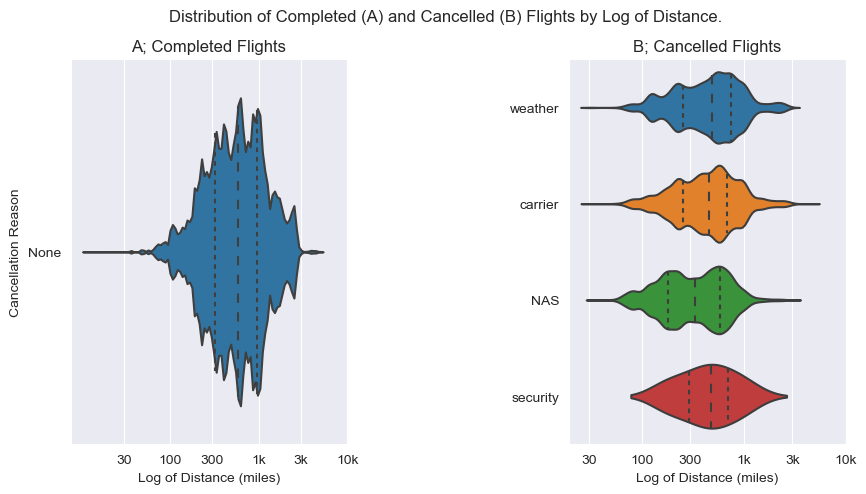

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust(wspace=0.8, hspace=0.3)
#fig.subplots_adjust(wspace=0.8)

ticks = [30, 100, 300, 1e3, 3e3, 1e4]
labels = ['30', '100', '300', '1k', '3k', '10k']

sb.violinplot(data=completed_flights, y='cancellationcode', x='log_distance', inner='quartile', ax= ax[0]);
ax[0].set_title('A; Completed Flights')
ax[0].set_xticks(log_trans(np.array(ticks)))
ax[0].set_xticklabels(labels)
ax[0].set_xlabel('Log of Distance (miles)')
ax[0].set_ylabel('Cancellation Reason');


sb.violinplot(data=cancelled_flights, y='cancellationcode', x='log_distance', inner='quartile', ax= ax[1]);
ax[1].set_title('B; Cancelled Flights');
ax[1].set_xticks(log_trans(np.array(ticks)))
ax[1].set_xticklabels(labels)
ax[1].set_xlabel('Log of Distance (miles)');
ax[1].set_ylabel('')

plt.suptitle('Distribution of Completed (A) and Cancelled (B) Flights by Log of Distance.');

## What is the best time of the day to schedule flights?

For the period, 3am is the best time for any day (Monday - Sunday) to schedule flight as it recorded 100% flight completion.


Saturday had the least number of cancelled flights for any hour in any day.


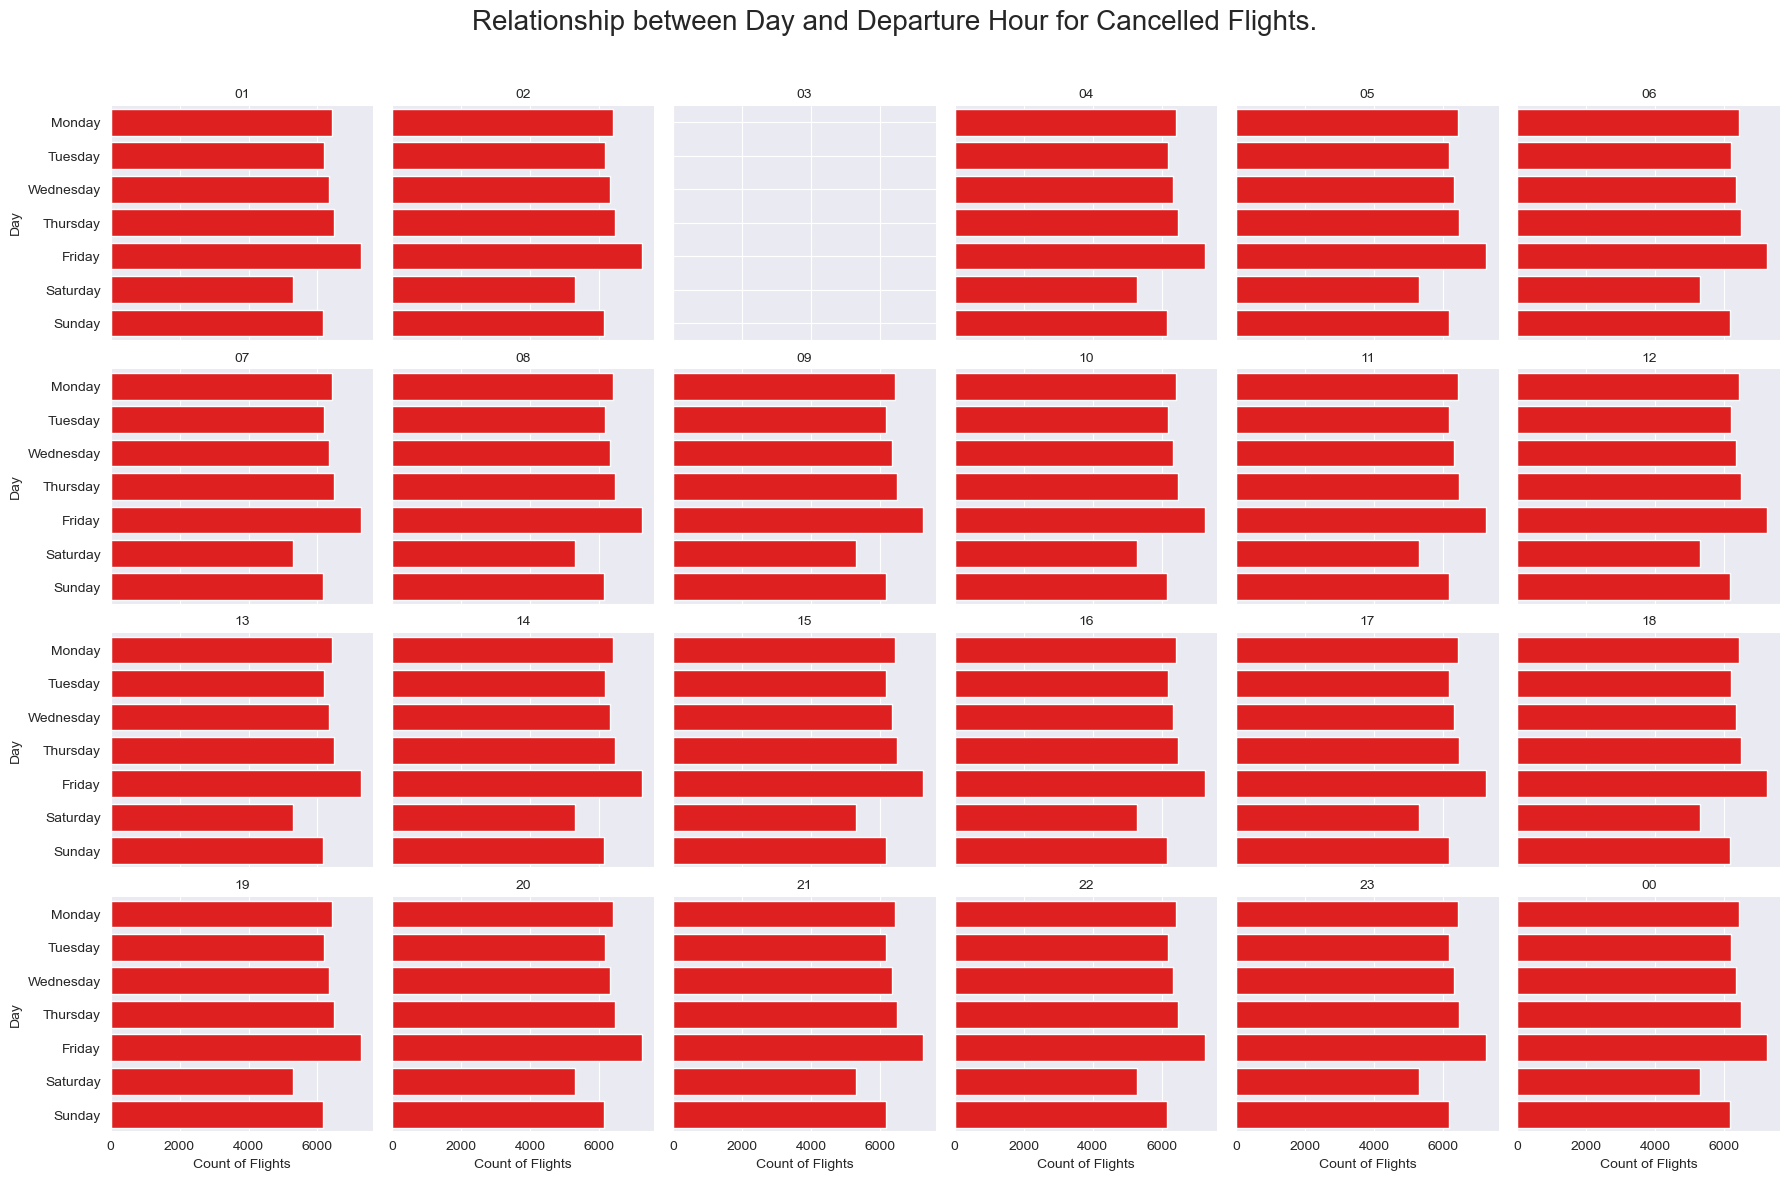

In [13]:

g = sb.FacetGrid(data=cancelled_flights, col= 'crsdephour', col_wrap= 6 )
g.map(sb.countplot, data=cancelled_flights, y='day', color='red')
g.set(ylabel = 'Day', xlabel= 'Count of Flights')
g.set_titles('{col_name}');
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Day and Departure Hour for Cancelled Flights.', size=20);

## What are the preferred times to schedule flights with the worst Airlines?

The best flight periods are 2am - 5am, between Wednesday and Friday for the worst Airlines.

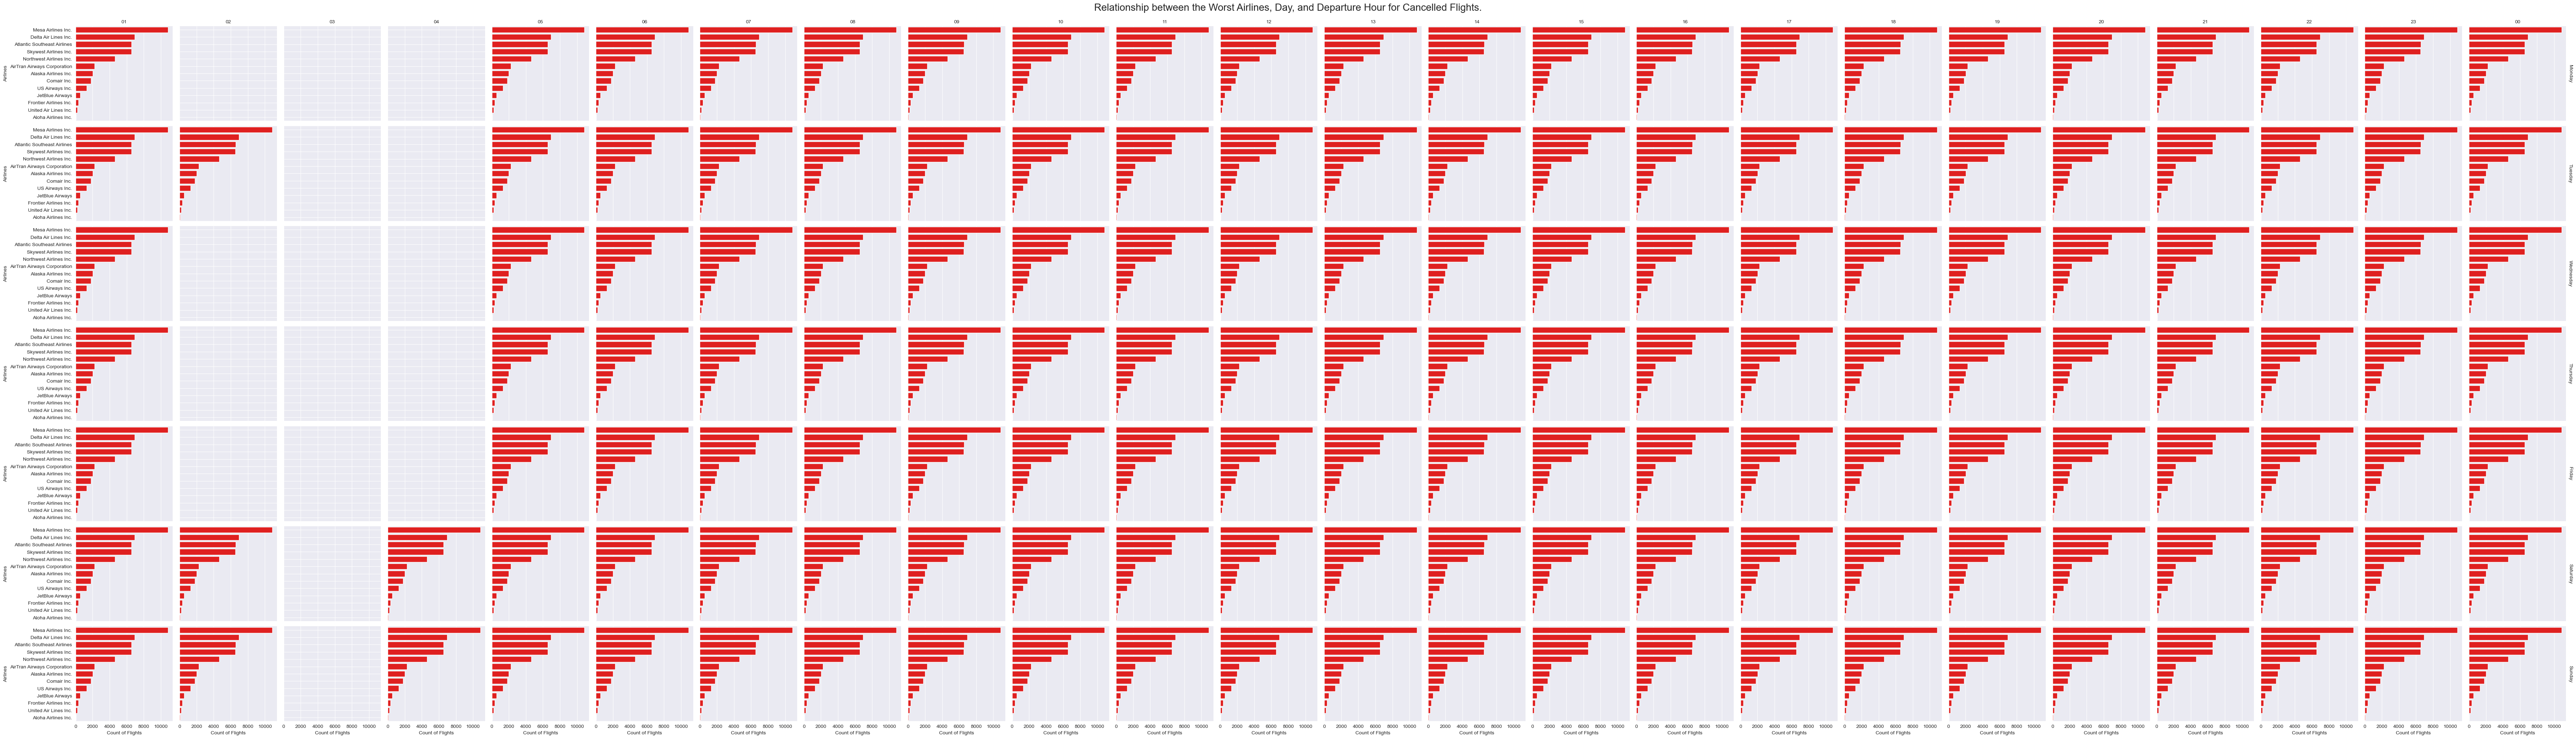

In [16]:

g = sb.FacetGrid(data= cancelled_flights, col= 'crsdephour', row= 'day',margin_titles= True)
g.map(sb.countplot, data=cancelled_flights, y='airline', color='red', order= order_airline)
g.set(ylabel = 'Airlines', xlabel= 'Count of Flights')
g.set_titles(col_template='{col_name}', row_template='{row_name}');
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Relationship between the Worst Airlines, Day, and Departure Hour for Cancelled Flights.', size=20);

## Is it possible to schedule flights with Mesa Airlines on a Saturday?

For 100% Flight completion rate, Users are adviced to book flights on Saturdays with Mesa Airlines Inc., around 12am - 4am.
Preferred airports are ordererd from least to best;

      1. 'Rapid City Regional'
      2. 'Wichita Mid-Continent'
      3. 'Seattle-Tacoma Intl', 
      4. 'Louisville International-Standiford '
      5. 'Joe Foss ', 
      6. 'Kent County International'
      7. 'Minneapolis-St Paul Intl'
      8. 'Sacramento International'
      9. 'Quad City'
      10. 'Daytona Beach International'.

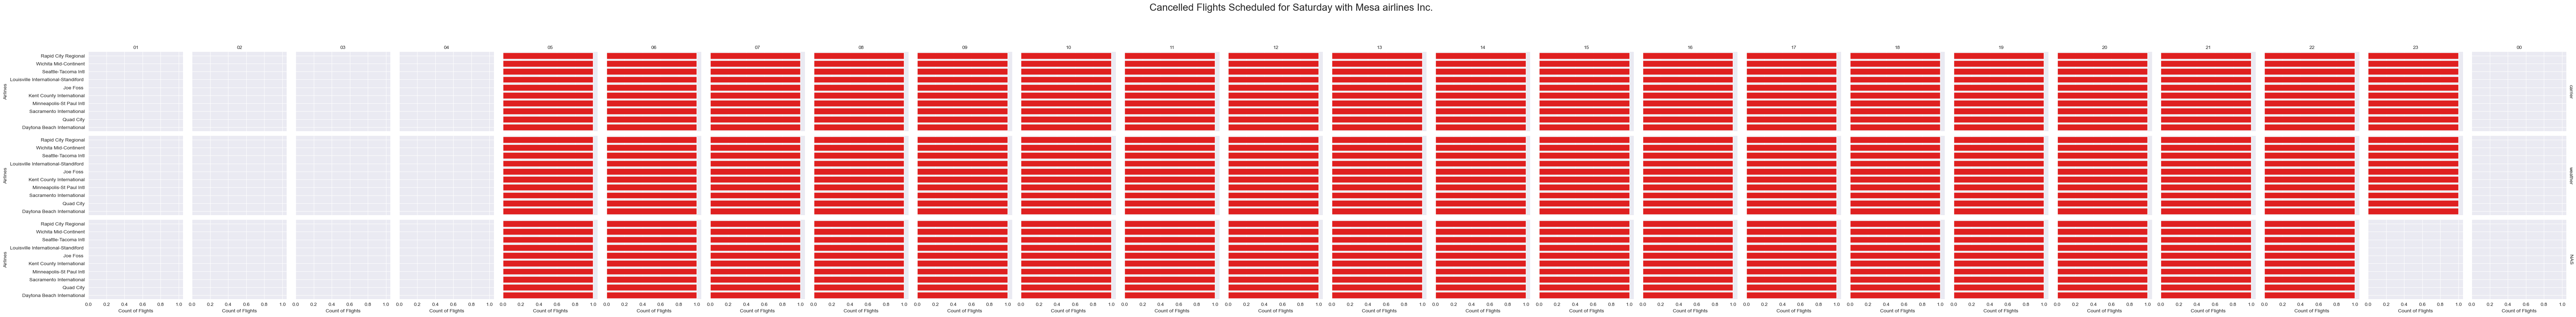

In [19]:
cancelled_flights_sub = cancelled_flights[(cancelled_flights.airline == 'Mesa Airlines Inc.')
                                          & (cancelled_flights.day == 'Saturday')]

order_sub = cancelled_flights_sub.origin_airport.value_counts().index[-10:]

g = sb.FacetGrid(data=cancelled_flights_sub, col= 'crsdephour', row= 'cancellationcode',margin_titles= True)
g.map(sb.countplot, data=cancelled_flights_sub, y='origin_airport', color='red',order= order_sub)
g.set_titles(col_template='{col_name}',row_template='{row_name}')
g.set(ylabel = 'Airlines', xlabel= 'Count of Flights');
g.fig.subplots_adjust(top=0.83)
g.fig.suptitle('Cancelled Flights Scheduled for Saturday with Mesa airlines Inc.', size=20);

In [20]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Flights.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Flights.ipynb to slides
[NbConvertApp] Writing 2069542 bytes to Part_II_slide_deck_Flights.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Okpokou\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Okpokou\Anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\Okpokou\Anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Okpokou\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\Okpokou\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filena

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
